# Implementing Custom RandomSearchCV

In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm  #Used for progress bar in output
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

#Genrate random dataset having 10000 values and 2 features 
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


In [45]:
print(x.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 2)
(10000,)
(7500, 2)
(2500, 2)
(7500,)
(2500,)


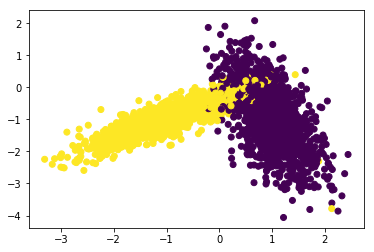

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [47]:
import random
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [48]:
def RandomSearchCV(X_train,Y_train,classifier,param_range,folds):
    param = random.sample(range(param_range[0],param_range[1]),10)
    train_scores = dict()
    test_scores  = dict()
    
    train_score = []
    test_score = []
    for t in tqdm(param):
        train_fold = []
        test_fold = []
        for j in range(0,folds):
            xtrain_indices = random.sample(range(0,len(X_train)),int(0.7*len(X_train)))
            xtest_indices = list(set(list(range(0,len(X_train)))) - set(xtrain_indices))
            
            x_train = X_train[xtrain_indices]
            y_train = Y_train[xtrain_indices]
            x_test = X_train[xtest_indices]
            y_test = Y_train[xtest_indices]
            
            classifier.n_neighbors = t
            classifier.fit(x_train,y_train)
            
            y_pred = classifier.predict(x_test)
            acc_score = accuracy_score(y_test,y_pred)
            test_fold.append(acc_score)
            
            y_pred = classifier.predict(x_train)
            acc_score = accuracy_score(y_train,y_pred)
            train_fold.append(acc_score)
        
        train_mean = np.mean(np.array(train_fold))
        test_mean = np.mean(np.array(test_fold))
        
        train_score.append(train_mean)
        test_score.append(test_mean)
        
        train_scores[t]=train_mean
        test_scores[t]=test_mean
    return train_scores,test_scores,param,train_score,test_score
    
    

In [50]:
warnings.filterwarnings('ignore')

param_range = [1,50]
folds = 3

classifier = KNeighborsClassifier()

trainscores,testscores,param,train_score,test_score = RandomSearchCV(X_train,y_train,classifier,param_range,folds)
print(trainscores)
print()
print(testscores)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.62it/s]


{14: 0.9577777777777778, 45: 0.9572063492063493, 11: 0.9597460317460317, 36: 0.9581587301587301, 6: 0.9600634920634921, 3: 0.9692698412698414, 20: 0.9576507936507936, 33: 0.9574603174603175, 9: 0.9594285714285715, 31: 0.9589841269841269}

{14: 0.9548148148148149, 45: 0.9583703703703703, 11: 0.9531851851851852, 36: 0.9548148148148149, 6: 0.9533333333333333, 3: 0.9407407407407407, 20: 0.9536296296296296, 33: 0.9561481481481482, 9: 0.9543703703703704, 31: 0.9521481481481482}


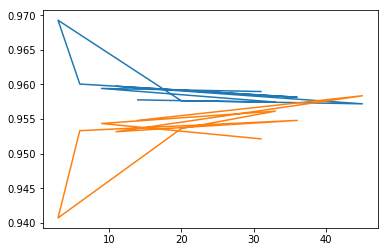

In [51]:
import matplotlib.pyplot as plt

plt.plot(param,train_score,label='train')
plt.plot(param,test_score,label='test')
plt.show()
